# Preparation

In [1]:
# Packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Data

penguins = pd.read_csv("penguins.csv")

In [3]:
# Understanding the data

print('The shape of the dataset is: ',penguins.shape)

The shape of the dataset is:  (344, 5)


In [4]:
# Preview

penguins.head()

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
3,NaN,NaN,NaN,NaN,0
4,36.7,19.3,193.0,3450.0,0


In [5]:
# Checking the number of unique values in each column

dicta={}
for i in list(penguins.columns):
    dicta[i]=penguins[i].value_counts().shape[0]

pd.DataFrame(dicta,index=['unique count']).transpose()

,unique count
CulmenLength,164
CulmenDepth,80
FlipperLength,55
BodyMass,94
Species,3


In [6]:
# Missing values

penguins.isnull().sum()

CulmenLength     2
CulmenDepth      2
FlipperLength    2
BodyMass         2
Species          0
dtype: int64

I could fill missing values with average values for individual classes, but missing values are so sparse that the fastest way to solve the problem is dropping rows which contain missing values.

In [7]:
# Dropping rows with missing values

penguins.dropna(axis=0, inplace=True)

In [8]:
penguins.isnull().sum()

CulmenLength     0
CulmenDepth      0
FlipperLength    0
BodyMass         0
Species          0
dtype: int64

In [9]:
# Explanatory variables and explained variable

features = ['CulmenLength','CulmenDepth','FlipperLength','BodyMass']
target = 'Species'
X, y = penguins[features], penguins[target]
print('X:')
display(X)
print('\ny:')
display(y)

X:


,CulmenLength,CulmenDepth,FlipperLength,BodyMass
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0
...,...,...,...,...
339,55.8,19.8,207.0,4000.0
340,43.5,18.1,202.0,3400.0
341,49.6,18.2,193.0,3775.0
342,50.8,19.0,210.0,4100.0



y:


0      0
1      0
2      0
4      0
5      0
      ..
339    2
340    2
341    2
342    2
343    2
Name: Species, Length: 342, dtype: int64

# Explanatory Data Analysis

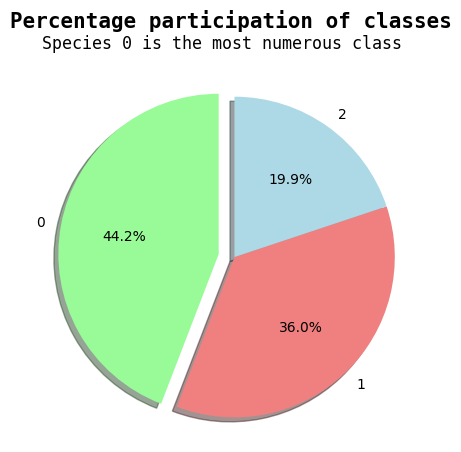

In [10]:
# Percentage participation of classes

png=Counter(penguins['Species'])
classes=[]
count=[]   #list to store no of laels of each class
for i in png.keys():
    classes.append(i)
    count.append(png[i])
colors = ["palegreen", "lightcoral", "lightblue"]

mfont = {'fontname':'monospace'}
plt.figure(figsize=(4,4))
plt.pie(
    count,
    explode=[0.1,0,0],
    labels = classes,
    shadow = True,
    colors = colors,
    startangle=90,
    autopct='%1.1f%%'
    )
plt.axis('equal')
plt.tight_layout()

plt.text(-1.4,1, "Percentage participation of classes\n\n\n", fontsize=15,fontweight='bold', **mfont)
plt.text(-1.2,1.3, "Species 0 is the most numerous class", fontsize=12, fontweight='light', **mfont)

plt.show()


In [11]:
# Summary statistics

X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CulmenLength,342.0,43.921930,5.459584,32.1,39.225,44.45,48.5,59.6
CulmenDepth,342.0,17.151170,1.974793,13.1,15.600,17.30,18.7,21.5
FlipperLength,342.0,200.915205,14.061714,172.0,190.000,197.00,213.0,231.0
BodyMass,342.0,4201.754386,801.954536,2700.0,3550.000,4050.00,4750.0,6300.0


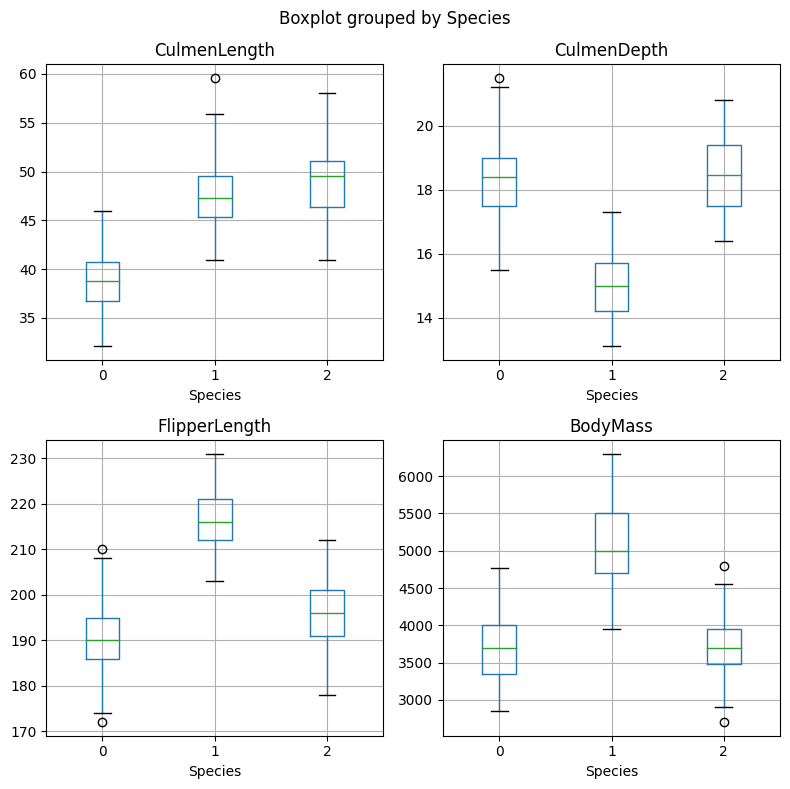

In [12]:
# Boxplots for explanatory variables according to explained variable

fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(8, 8))

penguins.boxplot(column='CulmenLength', by='Species', ax=axes[0,0])
penguins.boxplot(column='CulmenDepth', by='Species', ax=axes[0,1])
penguins.boxplot(column='FlipperLength', by='Species', ax=axes[1,0])
penguins.boxplot(column='BodyMass', by='Species', ax=axes[1,1])
fig.tight_layout()
fig.show()


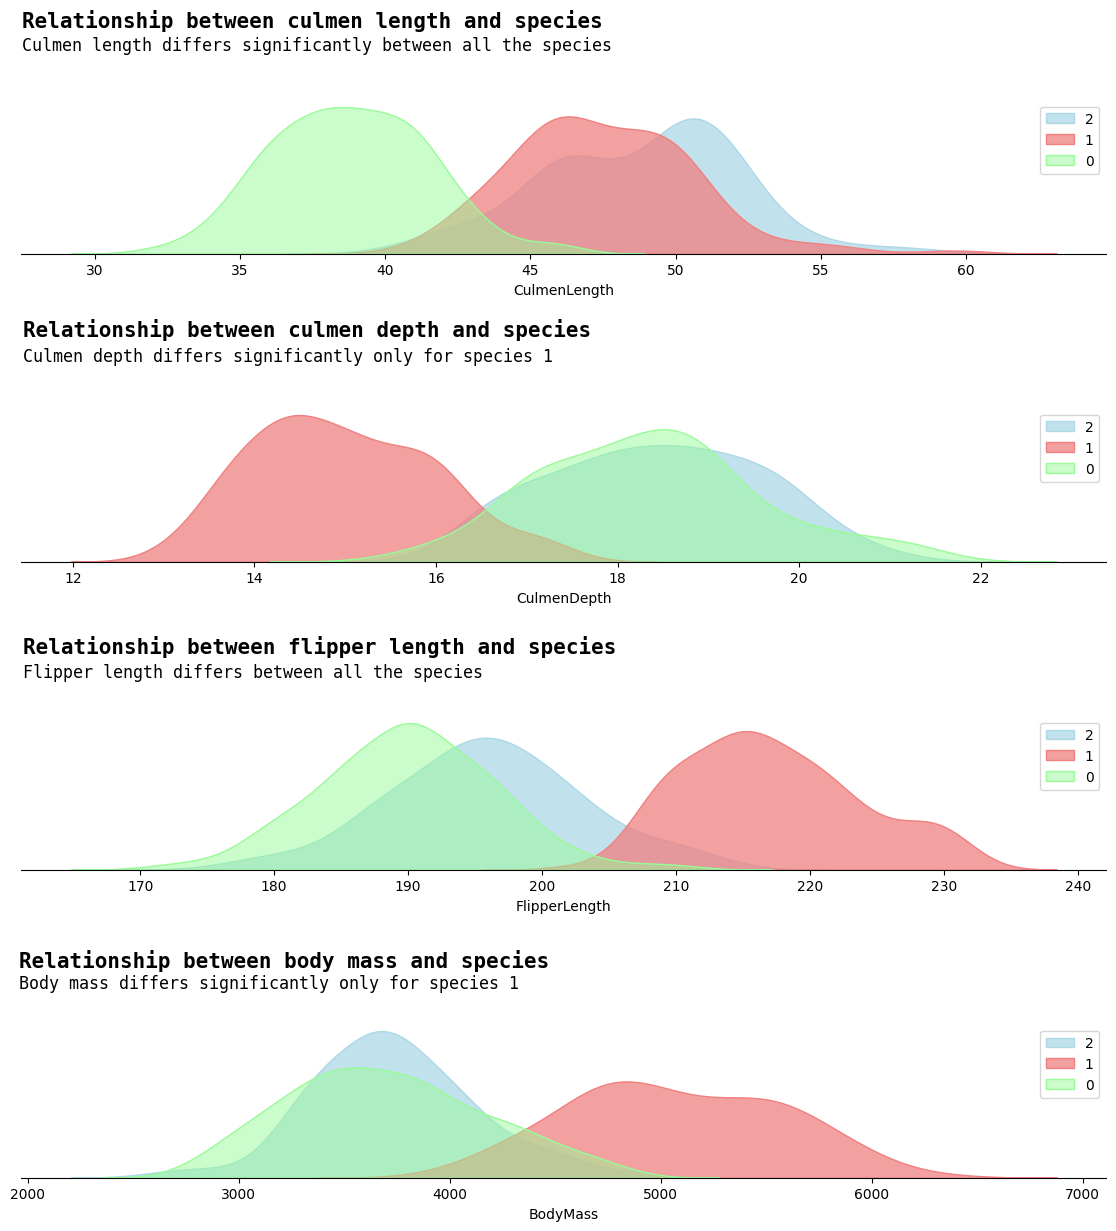

In [13]:
# Histograms for explanatory variables according to explained variable

fig=plt.figure(figsize=(14,14),facecolor='white')

ax=[None for i in range(4)]
gs=fig.add_gridspec(4,1)
gs.update(wspace=0, hspace=1)


ax[0]=fig.add_subplot(gs[0,0])
ax[1]=fig.add_subplot(gs[1,0])
ax[2]=fig.add_subplot(gs[2,0])
ax[3]=fig.add_subplot(gs[3,0])    

ax[0].text(27.5,0.2,'Relationship between culmen length and species',fontsize=15,fontweight='bold', fontfamily='monospace')
ax[0].text(27.5,0.18,'Culmen length differs significantly between all the species',fontsize=12,fontweight='light', fontfamily='monospace')
ax[1].text(11.45,0.55,'Relationship between culmen depth and species',fontsize=15,fontweight='bold', fontfamily='monospace')
ax[1].text(11.45,0.49,'Culmen depth differs significantly only for species 1 ',fontsize=12,fontweight='light', fontfamily='monospace')
ax[2].text(161.25,0.09,'Relationship between flipper length and species',fontsize=15,fontweight='bold', fontfamily='monospace')
ax[2].text(161.25, 0.08,'Flipper length differs between all the species',fontsize=12,fontweight='light', fontfamily='monospace')
ax[3].text(1961.25,0.0015,'Relationship between body mass and species',fontsize=15,fontweight='bold', fontfamily='monospace')
ax[3].text(1961.25, 0.00135,'Body mass differs significantly only for species 1',fontsize=12,fontweight='light', fontfamily='monospace')



sns.kdeplot(data=penguins[penguins.Species==2],x='CulmenLength',ax=ax[0],shade=True,color='lightblue',alpha=0.75, label='2')
sns.kdeplot(data=penguins[penguins.Species==1],x='CulmenLength',ax=ax[0],shade=True,color='lightcoral',alpha=0.75, label='1')
sns.kdeplot(data=penguins[penguins.Species==0],x='CulmenLength',ax=ax[0],shade=True,color='palegreen',alpha=0.5, label='0')
ax[0].legend()

sns.kdeplot(data=penguins[penguins.Species==2],x='CulmenDepth',ax=ax[1],shade=True,color='lightblue',alpha=0.75, label='2')
sns.kdeplot(data=penguins[penguins.Species==1],x='CulmenDepth',ax=ax[1],shade=True,color='lightcoral',alpha=0.75, label='1')
sns.kdeplot(data=penguins[penguins.Species==0],x='CulmenDepth',ax=ax[1],shade=True,color='palegreen',alpha=0.5, label='0')
ax[1].legend()

sns.kdeplot(data=penguins[penguins.Species==2],x='FlipperLength',ax=ax[2],shade=True,color='lightblue',alpha=0.75, label='2')
sns.kdeplot(data=penguins[penguins.Species==1],x='FlipperLength',ax=ax[2],shade=True,color='lightcoral',alpha=0.75, label='1')
sns.kdeplot(data=penguins[penguins.Species==0],x='FlipperLength',ax=ax[2],shade=True,color='palegreen',alpha=0.5, label='0')
ax[2].legend()

sns.kdeplot(data=penguins[penguins.Species==2],x='BodyMass',ax=ax[3],shade=True,color='lightblue',alpha=0.75, label='2')
sns.kdeplot(data=penguins[penguins.Species==1],x='BodyMass',ax=ax[3],shade=True,color='lightcoral',alpha=0.75, label='1')
sns.kdeplot(data=penguins[penguins.Species==0],x='BodyMass',ax=ax[3],shade=True,color='palegreen',alpha=0.5, label='0')
ax[3].legend()


for i in range(4):
    ax[i].set_yticklabels('')
    ax[i].set_ylabel('')
    ax[i].tick_params(axis='y',length=0)
    
    for direction in ['top','right','left']:
        ax[i].spines[direction].set_visible(False)

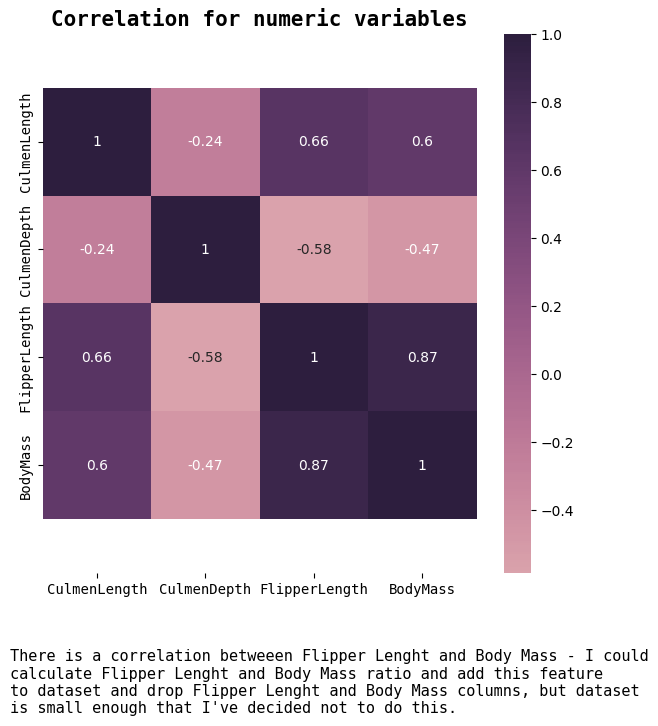

In [14]:
# Correlation for numeric variables

plt.figure(figsize=(7, 7))
mfont = {'fontname':'monospace'}
ax = sns.heatmap(X.corr(),
                 xticklabels=X.corr().columns,
                 yticklabels=X.corr().columns,
                 cmap=sns.cubehelix_palette(as_cmap=True),
                 center=0,
                 annot=True)

plt.title('Correlation for numeric variables', fontsize=15, **mfont, fontweight='bold')
plt.text(-0.3,5.8, "There is a correlation betweeen Flipper Lenght and Body Mass - I could\ncalculate Flipper Lenght and Body Mass ratio and add this feature\nto dataset and drop Flipper Lenght and Body Mass columns, but dataset\nis small enough that I've decided not to do this.",
         fontsize=11, fontweight='light', **mfont)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(fontsize=10, **mfont)
plt.yticks(fontsize=10, **mfont)
plt.show()

In [15]:
# Point-biserial correlation

corr_dict = {}
for col in features:
    corr_dict[col] = stats.pointbiserialr(X[col], y)[0]
pd.Series(corr_dict).sort_values(ascending=False).to_frame(name='Point-biserial correlation coefficient')

,Point-biserial correlation coefficient
CulmenLength,0.779857
FlipperLength,0.357472
BodyMass,0.209717
CulmenDepth,-0.183090


As I noticed earlier class depends mainly on Culmen Length and Flipper Length values.

# Modeling

In [16]:
# Packages

# data preparation 
from sklearn.model_selection import train_test_split  #splitting data
from sklearn.preprocessing import StandardScaler      #scaling data

# models
from sklearn.linear_model import LogisticRegression   
from sklearn.neighbors import KNeighborsClassifier    
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier

# cross validation
from sklearn.model_selection import GridSearchCV

# models evaluation
from sklearn.metrics import confusion_matrix          
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

In [17]:
# train and test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0, stratify=y)
print ('Treningowe obserwacje: %d\nTestowe obserwacje: %d' % (X_train.shape[0], X_test.shape[0]))

Treningowe obserwacje: 239
Testowe obserwacje: 103


In [18]:
# scaling the continuous featuree

scaler_2var = StandardScaler()
X_train_standardized = scaler_2var.fit_transform(X_train)
X_test_standardized = scaler_2var.transform(X_test)


In [19]:
# function for evaluating and comparing trained models

metrics_dataframe = pd.DataFrame(columns = ['Model', 'F1_score'])
metrics_dataframe
models = []
models_names = []
predictions_proba_list = []
mfont = {'fontname':'monospace'}
def calculate_metrics(model, name, X_checked, y_checked):
    models.append(model)
    models_names.append(name)
    global metrics_dataframe
    predictions = model.predict(X_checked)
    predictions_proba = model.predict_proba(X_checked)
    predictions_proba_list.append(predictions_proba[:,1])
    
    cm = confusion_matrix(y_checked, predictions)
    ax = sns.heatmap(cm, annot=True, cmap=sns.cubehelix_palette(as_cmap=True), fmt='.0f')
    ax.set_title('Confusion Matrix\n',fontsize=15, **mfont, fontweight='bold')
    ax.set_xlabel('\nPredicted Values',fontsize=10, **mfont, fontweight='light')
    ax.set_ylabel('Actual Values ',fontsize=10, **mfont, fontweight='light')
    plt.show()

    ############## metryki dla sprawdzanego modelu ################
    # Precision, Recall, F1, Accuracy
    print(classification_report(y_checked, predictions))

    f1_metric = f1_score(y_checked, predictions, average='micro')
    
    metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric,},
                                                 ignore_index=True)
    return metrics_dataframe

# Logistic Regression

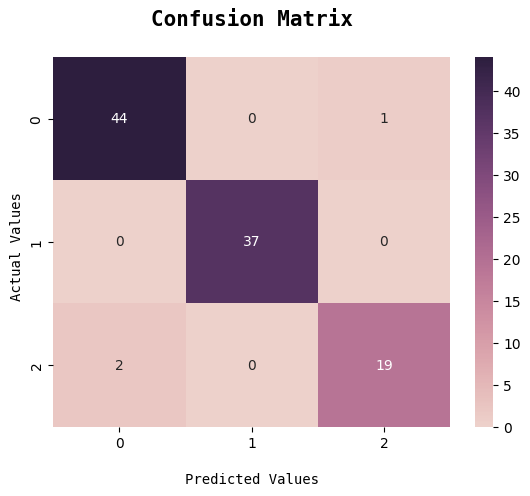

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        45
           1       1.00      1.00      1.00        37
           2       0.95      0.90      0.93        21

    accuracy                           0.97       103
   macro avg       0.97      0.96      0.96       103
weighted avg       0.97      0.97      0.97       103



,Model,F1_score
0,Logistic Regression,0.970874


In [20]:
# training
model_lr = LogisticRegression()
model_lr.fit(X_train_standardized, y_train)

# evaluation
calculate_metrics(model_lr,"Logistic Regression", X_test_standardized, y_test)

# K Neighbor Classifier

In [21]:
# cross validation and training
knc = KNeighborsClassifier()
params_knc = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]}
knc_gridsearch = GridSearchCV(knc,
                             params_knc,
                             scoring='f1_macro',
                             cv=10,
                             n_jobs=-1)
knc_gridsearch.fit(X_train, y_train)
print('\nBest hyperparameter:', knc_gridsearch.best_params_)
knc_model = knc_gridsearch.best_estimator_


Best hyperparameter: {'n_neighbors': 1}


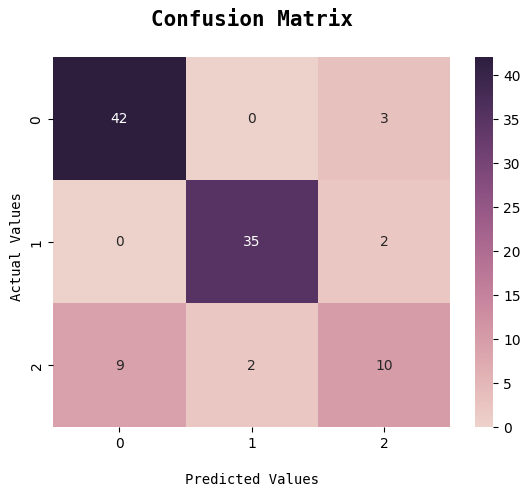

              precision    recall  f1-score   support

           0       0.82      0.93      0.87        45
           1       0.95      0.95      0.95        37
           2       0.67      0.48      0.56        21

    accuracy                           0.84       103
   macro avg       0.81      0.79      0.79       103
weighted avg       0.84      0.84      0.84       103



,Model,F1_score
0,Logistic Regression,0.970874
1,KNN,0.844660


In [22]:
# evaluation
calculate_metrics(knc_model,"KNN", X_test, y_test)

# Decision Tree Classifier

In [23]:
# cross validation and training
dtc = DecisionTreeClassifier()
params_dtc = {'max_depth': [3, 5, 10, 15, 20],
              'min_samples_leaf': [3, 5, 10, 15]
             }
dtc_gridsearch = GridSearchCV(dtc,
                             params_dtc,
                             scoring='f1_macro',
                             cv=10,
                             n_jobs=-1)
dtc_gridsearch.fit(X_train, y_train)
print('\nBest hyperparameter:', dtc_gridsearch.best_params_)
dtc_model = dtc_gridsearch.best_estimator_


Best hyperparameter: {'max_depth': 20, 'min_samples_leaf': 3}


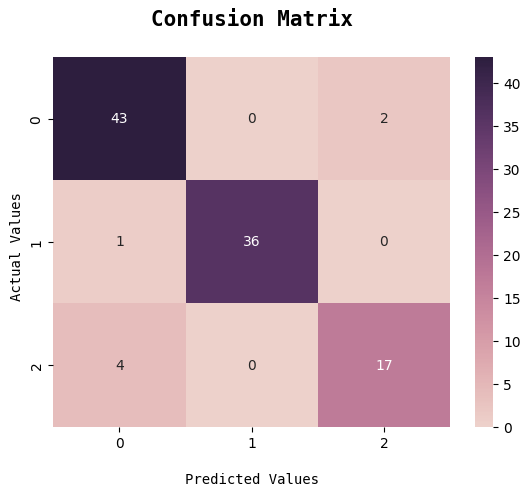

              precision    recall  f1-score   support

           0       0.90      0.96      0.92        45
           1       1.00      0.97      0.99        37
           2       0.89      0.81      0.85        21

    accuracy                           0.93       103
   macro avg       0.93      0.91      0.92       103
weighted avg       0.93      0.93      0.93       103



,Model,F1_score
0,Logistic Regression,0.970874
1,KNN,0.844660
2,Decision Tree,0.932039


In [24]:
#evaluation
calculate_metrics(dtc_model,"Decision Tree", X_test, y_test)

# SVC

In [25]:
# cross validation and training
svc = SVC(probability=True)
params_svc = {'C': [10,20,30,50,100,200]
             }
svc_gridsearch = GridSearchCV(svc,
                             params_svc,
                             scoring='f1_macro',
                             cv=10,
                             n_jobs=-1)
svc_gridsearch.fit(X_train_standardized, y_train)
print('\nBest hyperparameter:', svc_gridsearch.best_params_)
svc_model = svc_gridsearch.best_estimator_


Best hyperparameter: {'C': 50}


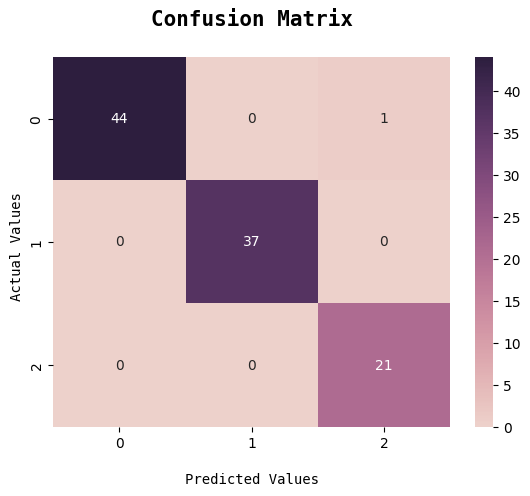

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        45
           1       1.00      1.00      1.00        37
           2       0.95      1.00      0.98        21

    accuracy                           0.99       103
   macro avg       0.98      0.99      0.99       103
weighted avg       0.99      0.99      0.99       103



,Model,F1_score
0,Logistic Regression,0.970874
1,KNN,0.844660
2,Decision Tree,0.932039
3,SVC,0.990291


In [26]:
#evaluation
calculate_metrics(svc_model,"SVC", X_test_standardized, y_test)

# Random Forest Classifier

In [27]:
#cross validation and training
rfc = RandomForestClassifier(n_estimators=1000, n_jobs=-1)
params_rfc = {'max_depth': [3, 5, 10, 20],
             'min_samples_leaf': [3, 5, 10, 15]}
rfc_gridsearch = GridSearchCV(rfc,
                             params_rfc,
                             scoring='f1_macro',
                             cv=5,
                             verbose=10, n_jobs=-1)
rfc_gridsearch.fit(X_train, y_train)
print('\nBest hyperparameter:', rfc_gridsearch.best_params_)
rfc_model = rfc_gridsearch.best_estimator_

Fitting 5 folds for each of 16 candidates, totalling 80 fits

Best hyperparameter: {'max_depth': 3, 'min_samples_leaf': 3}


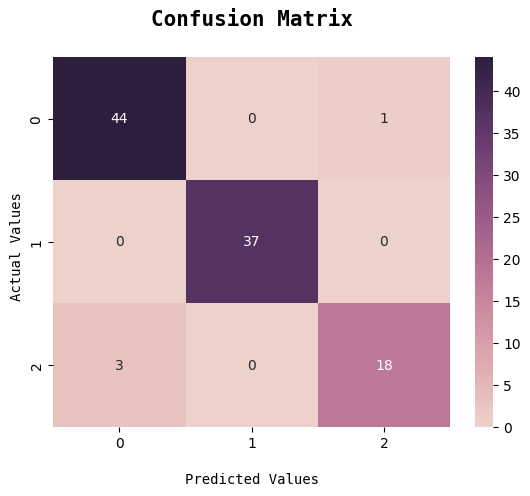

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        45
           1       1.00      1.00      1.00        37
           2       0.95      0.86      0.90        21

    accuracy                           0.96       103
   macro avg       0.96      0.94      0.95       103
weighted avg       0.96      0.96      0.96       103



,Model,F1_score
0,Logistic Regression,0.970874
1,KNN,0.844660
2,Decision Tree,0.932039
3,SVC,0.990291
4,Random Forest,0.961165


In [28]:
#evaluation
calculate_metrics(rfc_model,"Random Forest", X_test, y_test)

# Ada Boost Classifier

In [29]:
# cross validation and training
abc = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1))
params_abc = {'n_estimators': [3,5,10,20,30,50]
             }
abc_gridsearch = GridSearchCV(abc,
                             params_abc,
                             scoring='f1_macro',
                             cv=10,
                             verbose=10, n_jobs=-1)
abc_gridsearch.fit(X_train, y_train)
print('\nBest hyperparameter:', abc_gridsearch.best_params_)
abc_model = abc_gridsearch.best_estimator_

Fitting 10 folds for each of 6 candidates, totalling 60 fits

Best hyperparameter: {'n_estimators': 10}


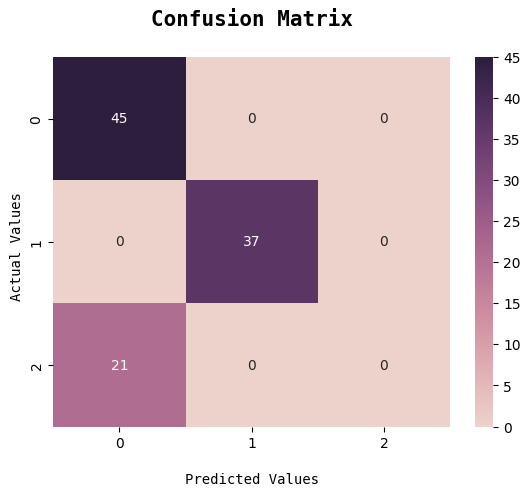

              precision    recall  f1-score   support

           0       0.68      1.00      0.81        45
           1       1.00      1.00      1.00        37
           2       0.00      0.00      0.00        21

    accuracy                           0.80       103
   macro avg       0.56      0.67      0.60       103
weighted avg       0.66      0.80      0.71       103



,Model,F1_score
0,Logistic Regression,0.970874
1,KNN,0.844660
2,Decision Tree,0.932039
3,SVC,0.990291
4,Random Forest,0.961165
5,AdaBoost,0.796117


In [30]:
# evaluation
calculate_metrics(abc_model,"AdaBoost", X_test, y_test)

# Voting Classifier

In [31]:
# traingn
model_voting = VotingClassifier(estimators=[('SVC', svc_model),
                                            ('Random Forest', rfc_model),
                                            ('Logistic Regression', model_lr)],
                                voting='soft',
                                weights =[0.7,0.2,0.1])
model_voting.fit(X_train, y_train)


VotingClassifier(estimators=[('SVC', SVC(C=50, probability=True)),
                             ('Random Forest',
                              RandomForestClassifier(max_depth=3,
                                                     min_samples_leaf=3,
                                                     n_estimators=1000,
                                                     n_jobs=-1)),
                             ('Logistic Regression', LogisticRegression())],
                 voting='soft', weights=[0.7, 0.2, 0.1])

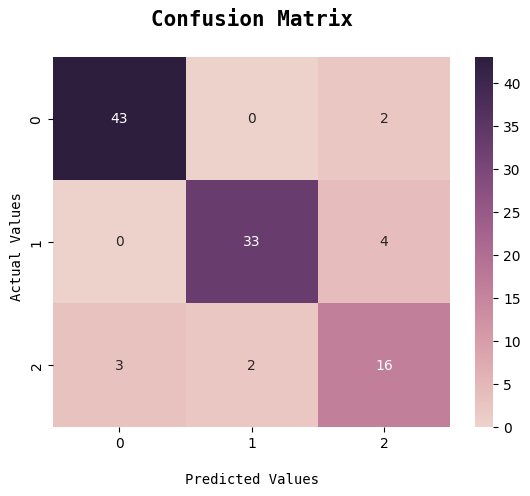

              precision    recall  f1-score   support

           0       0.93      0.96      0.95        45
           1       0.94      0.89      0.92        37
           2       0.73      0.76      0.74        21

    accuracy                           0.89       103
   macro avg       0.87      0.87      0.87       103
weighted avg       0.90      0.89      0.89       103



,Model,F1_score
0,Logistic Regression,0.970874
1,KNN,0.844660
2,Decision Tree,0.932039
3,SVC,0.990291
4,Random Forest,0.961165
5,AdaBoost,0.796117
6,Voting Classifier,0.893204


In [32]:
#evauation
calculate_metrics(model_voting,"Voting Classifier", X_test, y_test)

In [33]:
# Sorting F1_scores in descending order

metrics_dataframe.sort_values(by="F1_score", ascending=False)

,Model,F1_score
3,SVC,0.990291
0,Logistic Regression,0.970874
4,Random Forest,0.961165
2,Decision Tree,0.932039
6,Voting Classifier,0.893204
1,KNN,0.844660
5,AdaBoost,0.796117


# Conclusions:

The best model for dataset is SVC with F_1 score 0.99

Logistic Regression and Random Forest performe well too, with F_1 scores accordingly 0.97 and 0.96